## Iniciando una rutina típica de manejo de datos
- Temperature (°C) https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [3]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.4,2.3,Åland
1,1743-12-01,nan,nan,Åland
2,1744-01-01,nan,nan,Åland
3,1744-02-01,nan,nan,Åland
4,1744-03-01,nan,nan,Åland
...,...,...,...,...
577457,01/05/2013,19.1,1.0,Zimbabwe
577458,01/06/2013,17.6,0.5,Zimbabwe
577459,01/07/2013,17.0,0.5,Zimbabwe
577460,01/08/2013,19.8,0.7,Zimbabwe


In [4]:
df_temp.shape

(577462, 4)

In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [7]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-01-05
577458   2013-01-06
577459   2013-01-07
577460   2013-01-08
577461   2013-01-09
Name: year, Length: 577462, dtype: datetime64[ns]

In [8]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')         #Boolean filtering
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,01/02/1970,-10.8,0.5,Åland,1970-01-02
2716,01/03/1970,-1.6,0.6,Åland,1970-01-03
2717,01/04/1970,0.5,0.5,Åland,1970-01-04
2718,01/05/1970,6.9,0.6,Åland,1970-01-05
2719,01/06/1970,14.3,0.7,Åland,1970-01-06
...,...,...,...,...,...
577457,01/05/2013,19.1,1.0,Zimbabwe,2013-01-05
577458,01/06/2013,17.6,0.5,Zimbabwe,2013-01-06
577459,01/07/2013,17.0,0.5,Zimbabwe,2013-01-07
577460,01/08/2013,19.8,0.7,Zimbabwe,2013-01-08


In [11]:
df_temp.pivot_table(values='AverageTemperature', index=['Country',pd.Grouper(key='year', freq= '1Y')],aggfunc={'AverageTemperature':[np.mean,np.median]})  
#Forma de sacarlo con Pivot_Table, no trae los valores nulos de la Antartida

AverageTemperature       
                                     mean median
Country     year                                
Afghanistan 1970-12-31               16.0   16.2
            1971-12-31               14.8   14.9
            1972-12-31               12.5   13.9
            1973-12-31               14.2   14.9
            1974-12-31               13.3   13.6
...                                   ...    ...
Åland       2009-12-31                6.5    5.6
            2010-12-31                4.9    4.8
            2011-12-31                7.2    7.5
            2012-12-31                6.1    6.3
            2013-12-31                6.2    6.0

[10648 rows x 2 columns]

In [137]:
df_t_avg = df_temp.groupby(['Country',pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature':[np.mean,np.median]})   
df_t_avg         ##Forma de sacarlo con Groupby hay 44 filas mas por la antartida pero sin datos 

AverageTemperature       
                                     mean median
Country     year                                
Afghanistan 1970-12-31               16.0   16.2
            1971-12-31               14.8   14.9
            1972-12-31               12.5   13.9
            1973-12-31               14.2   14.9
            1974-12-31               13.3   13.6
...                                   ...    ...
Åland       2009-12-31                6.5    5.6
            2010-12-31                4.9    4.8
            2011-12-31                7.2    7.5
            2012-12-31                6.1    6.3
            2013-12-31                6.2    6.0

[10692 rows x 2 columns]

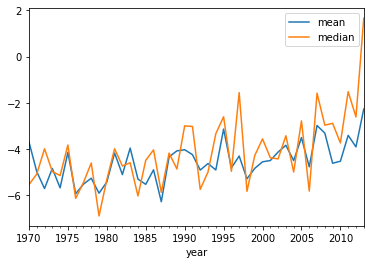

In [138]:
df_t_avg.xs('Russia')['AverageTemperature'].plot();

In [139]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()     #Se accede a la columna AverageTemperature para sacer la mediana
df_t_med       #Se trabaja mejor con la mediana porque no sufre sesgos ante los Outliers(Valores Atípicos)

,Country,year,median
0,Afghanistan,1970-12-31,16.2
1,Afghanistan,1971-12-31,14.9
2,Afghanistan,1972-12-31,13.9
3,Afghanistan,1973-12-31,14.9
4,Afghanistan,1974-12-31,13.6
...,...,...,...
10687,Åland,2009-12-31,5.6
10688,Åland,2010-12-31,4.8
10689,Åland,2011-12-31,7.5
10690,Åland,2012-12-31,6.3


In [140]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med

,Country,year,median,date
0,Afghanistan,1970-12-31,16.2,1970
1,Afghanistan,1971-12-31,14.9,1971
2,Afghanistan,1972-12-31,13.9,1972
3,Afghanistan,1973-12-31,14.9,1973
4,Afghanistan,1974-12-31,13.6,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.6,2009
10688,Åland,2010-12-31,4.8,2010
10689,Åland,2011-12-31,7.5,2011
10690,Åland,2012-12-31,6.3,2012


In [141]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med.head()

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.2,1970
1,Afghanistan,1971-12-31,14.9,1971
2,Afghanistan,1972-12-31,13.9,1972
3,Afghanistan,1973-12-31,14.9,1973
4,Afghanistan,1974-12-31,13.6,1974


In [142]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.head()

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.2,25.2,12.4,23.3,26.7,11.6,23.0,27.2,27.2,15.1,...,15.8,15.5,25.3,24.6,26.7,23.8,27.4,22.1,23.3,6.9
1971,14.9,24.8,11.7,22.8,26.5,11.9,22.5,26.5,26.4,14.8,...,16.5,13.0,24.6,24.1,26.2,20.3,26.5,21.8,22.7,4.5
1972,13.9,25.1,11.2,22.5,26.8,10.0,22.6,26.9,26.8,14.3,...,16.9,13.6,25.3,24.5,26.6,21.4,26.8,22.0,22.4,5.6
1973,14.9,25.3,11.8,23.0,27.0,9.6,23.1,27.3,27.2,14.9,...,17.5,13.5,25.2,25.0,27.1,22.9,27.2,22.1,22.6,3.6
1974,13.6,24.8,11.3,21.6,26.6,8.2,22.3,26.6,26.5,15.2,...,17.4,13.2,25.1,24.4,26.2,21.6,26.6,21.6,21.3,5.5


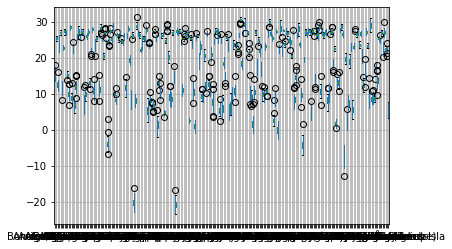

In [143]:
df_t_pivot.boxplot();       #Por el tamaño de los datos no podemos hacer un analisis correcto

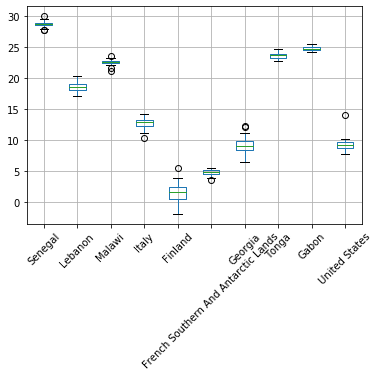

In [144]:
df_t_pivot.T.sample(10).T.boxplot(rot=45);      #Se saca una muestra de los paises para esto hay que hacer una transposicion en el df   
# rot=45 es una rotación a los nombres 

## Preprocesamiento de datos: terminando de preparar y limpiar los datasets

- Topic https://data.worldbank.org/topic/climate-change
- CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT
- Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2
- Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2
- Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL
- Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

## Normalizacion de Tablas

In [145]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)    #header para quitar las filas que no nos sirven de arriba del df 
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)

In [146]:
df_agri.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,nan,nan,nan,nan
1,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,"377,000.0","377,600.0","378,100.0","378,730.0","378,750.0",...,"379,100.0","379,100.0","379,100.0","379,100.0","379,100.0","379,100.0",nan,nan,nan,nan
2,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,"571,700.0","572,000.0","572,200.0","572,500.0","572,700.0",...,"589,900.0","589,900.0","591,900.0","591,900.0","591,900.0","591,900.0",nan,nan,nan,nan
3,Albania,ALB,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,"12,320.0","12,320.0","12,330.0","12,300.0","12,370.0",...,"12,010.0","12,013.0","11,873.0","11,742.9","11,743.0","11,817.0",nan,nan,nan,nan
4,Andorra,AND,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,260.0,260.0,260.0,260.0,260.0,...,197.7,187.6,188.1,188.1,188.1,187.8,nan,nan,nan,nan


In [147]:
range(1971,2015)        #Se escogen las columnas que se vayan a utilizar 
list(map(str,range(1971,2015)))  # Se genera una lista 
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:7]

['Country Name', 'Country Code', '1971', '1972', '1973', '1974', '1975']

In [148]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(columns={'variable':'Date',       #Con melt podemos normalizar una tabla
                                                                                  'Country Name':'Country', 
                                                                                  'Country Code':'Code',
                                                                                  'value':'Agriculture'})

,Country,Code,Date,Agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,"380,360.0"
2,Angola,AGO,1971,"574,000.0"
3,Albania,ALB,1971,"12,000.0"
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,nan
11612,"Yemen, Rep.",YEM,2014,"235,460.0"
11613,South Africa,ZAF,2014,"968,410.0"
11614,Zambia,ZMB,2014,"238,360.0"


In [149]:
def fun_format(df, col):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',   
               'Country Name':'Country',
               'Country Code':'name',
               'value':col})

In [150]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')

In [151]:
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,"59,440.0"
1,Afghanistan,AFG,1971,"11,475,445.0"
2,Angola,AGO,1971,"6,040,777.0"
3,Albania,ALB,1971,"2,187,853.0"
4,Andorra,AND,1971,"25,559.0"
...,...,...,...,...
11611,Kosovo,XKX,2014,"1,821,800.0"
11612,"Yemen, Rep.",YEM,2014,"25,823,485.0"
11613,South Africa,ZAF,2014,"54,545,991.0"
11614,Zambia,ZMB,2014,"15,399,753.0"


In [152]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.2,1970
1,Afghanistan,1971-12-31,14.9,1971
2,Afghanistan,1972-12-31,13.9,1972
3,Afghanistan,1973-12-31,14.9,1973
4,Afghanistan,1974-12-31,13.6,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.6,2009
10688,Åland,2010-12-31,4.8,2010
10689,Åland,2011-12-31,7.5,2011
10690,Åland,2012-12-31,6.3,2012


In [153]:
df_popu.info()      #Para poder realizar el merge nos damos cuenta que nuestra date es de tipo de dato obj, hay que transformalo a int o float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [154]:
df_popu['date'] = df_popu['date'].astype(float)          #A todas las columnas date les cambiamos el tipo de dato por float
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [155]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],df_popu, on = ['Country','date'], how = 'inner')   #Join entre tablas

In [156]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9,1971,AFG,"11,475,445.0"
1,Afghanistan,13.9,1972,AFG,"11,791,215.0"
2,Afghanistan,14.9,1973,AFG,"12,108,963.0"
3,Afghanistan,13.6,1974,AFG,"12,412,950.0"
4,Afghanistan,13.5,1975,AFG,"12,689,160.0"
...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0"


In [157]:
#df_list = [df_co2e, df_elec, df_agri, df_fore]            
#for df in df_list:
     #df_merge = pd.merge(df_merge, df, on = ['Country','name','date'], how = 'inner')

In [158]:
df_merge = pd.merge(df_merge, df_co2e, on = ['Country','name','date'], how = 'inner')    #Con el df creado de temp y poplacion, se agregan los demas datos

df_merge = pd.merge(df_merge, df_elec, on = ['Country','name','date'], how = 'inner')

df_merge = pd.merge(df_merge, df_agri, on = ['Country','name','date'], how = 'inner')

df_merge = pd.merge(df_merge, df_fore, on = ['Country','name','date'], how = 'inner')

In [159]:
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9,1971,AFG,"11,475,445.0","1,895.8",nan,"380,360.0",nan
1,Afghanistan,13.9,1972,AFG,"11,791,215.0","1,532.8",nan,"380,460.0",nan
2,Afghanistan,14.9,1973,AFG,"12,108,963.0","1,639.1",nan,"380,480.0",nan
3,Afghanistan,13.6,1974,AFG,"12,412,950.0","1,917.8",nan,"380,480.0",nan
4,Afghanistan,13.5,1975,AFG,"12,689,160.0","2,126.9",nan,"380,480.0",nan
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


## Análisis de datos

In [160]:
df_climate = df_merge.dropna()

In [161]:
df_climate

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4,1990,ALB,"3,286,542.0","5,515.2",552.3,"11,210.0","7,888.0"
63,Albania,11.6,1991,ALB,"3,266,790.0","4,286.7",418.5,"11,270.0","7,868.5"
64,Albania,13.6,1992,ALB,"3,247,039.0","2,515.6",453.6,"11,270.0","7,849.0"
65,Albania,13.7,1993,ALB,"3,227,287.0","2,335.9",536.4,"11,260.0","7,829.5"
66,Albania,13.2,1994,ALB,"3,207,536.0","1,925.2",596.4,"11,260.0","7,810.0"
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


In [162]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [163]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [164]:
df_max_co2 = df_climate[df_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany','United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


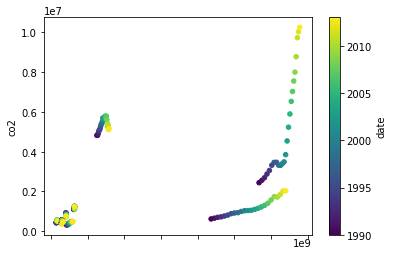

In [165]:
df_max_co2.set_index('Country').plot.scatter(x='population',y='co2',c='date',colormap='viridis');

In [166]:
df_climate.corr()

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [167]:
import seaborn as sns

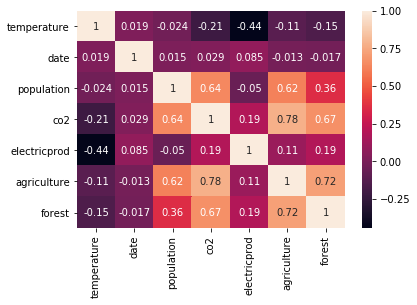

In [168]:
sns.heatmap(df_climate.corr(), annot=True).autoscale();

In [170]:
df_med = df_climate.groupby('date').median()          #Por año a nivel global 
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


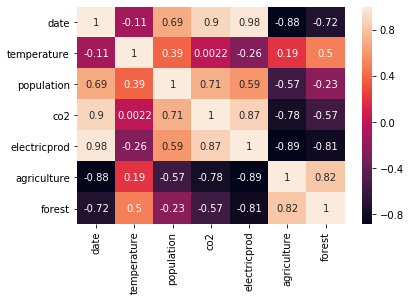

In [84]:
sns.heatmap(df_med.reset_index().corr(),annot=True).autoscale();        #Por año a nivel global

In [172]:
from pandas.plotting import scatter_matrix

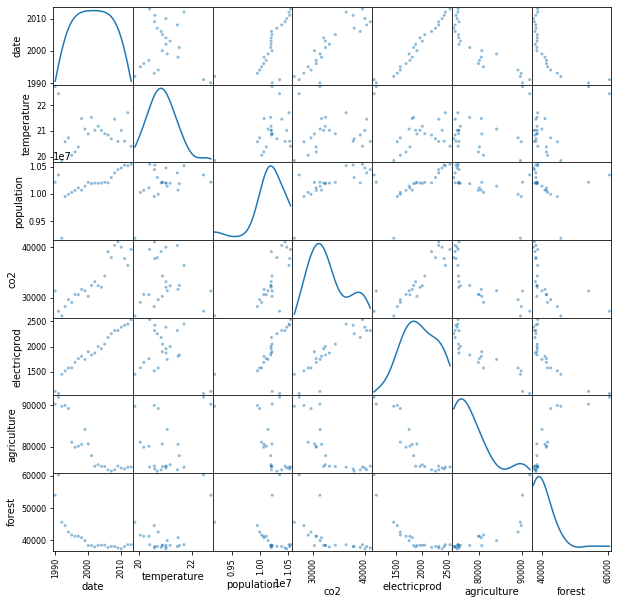

In [173]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (10,10));

In [174]:
from pandas.plotting import parallel_coordinates

In [176]:
df_samerica = df_climate[df_climate['Country'].isin(['Colombia','Argentina','Bolivia','Mexico','Peru','Chile'])][['Country', 'temperature', 'co2',                                                                                                                                                                          'agriculture','forest']]

In [177]:
df_samerica

,Country,temperature,co2,agriculture,forest
277,Argentina,15.4,"112,147.9","1,275,650.0","347,930.0"
278,Argentina,14.9,"117,098.3","1,276,600.0","344,997.0"
279,Argentina,14.9,"121,352.0","1,277,550.0","342,064.0"
280,Argentina,15.5,"117,927.1","1,278,500.0","339,131.0"
281,Argentina,15.0,"122,408.1","1,279,480.0","336,198.0"
...,...,...,...,...,...
5370,Peru,20.6,"51,704.7","239,460.0","749,544.0"
5371,Peru,20.5,"57,593.9","240,230.0","748,110.0"
5372,Peru,20.3,"49,632.8","241,040.0","746,434.0"
5373,Peru,20.6,"55,071.0","243,321.0","744,758.0"


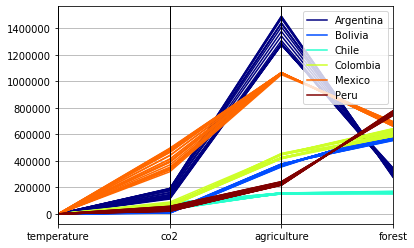

In [180]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet');